## 2. Missing Values

Missing Values: It refers to the situation where there is a deficiency in the observations.

How to solve missing data problem?
- Deletion approach
- Value Assignment Methods (Simple Assignment Methods)
     - Mode, Median etc. done using transactions.
- Predictive Methods
     - It is done using Machine Learning or some statistical methods.

"**The idea of imputation is both seductive and dangerous.**" (R.J.A Little & D.B. Rubin)

One of the important issues to consider when working with missing data: The randomness of missing data.

We can think of it this way. Let's say we have data that includes a person's credit card expenses. If a person does not have a credit card, their expenses will also be taken as 0 or NaN in this case. This means that the deficiency in one variable occurs in the absence of another variable. So there is no such thing as random.

----- 

Eksik Değerler: Gözlemlerde eksiklik olması durumunu ifade etmektedir.

Eksik veri problemi nasıl çözülür? 
- Silme yaklaşımı
- Değer Atama Yöntemleri (Basit Atama Yöntemleri)
    - Mod, Medyan vb. işlemlere kullanılarak yapılır.
- Tahmine Dayalı Yöntemler
    - Makine Öğrenmesi veya bazı istatistikler yöntemler kullanılarak yapılır.

Eksik veri ile çalışırken göz önünde bulundurulması gereken önemli konulardan birisi: Eksik verinin rassallığı

Bunu şu şekilde düşünebiliriz. Bir kişinin kredi kartı harcamalarını içeren bir verimiz olsun. Eğer bir kişinin kredi kartı yoksa harcamaları da bu durumda 0 veya NaN olarak alınacaktır. Bu, bir değişkendeki eksikliğin başka bir değişkenin eksikliğinde ortaya çıkması anlamına gelmektedir. Yani rastgele gibi bir durum yoktur. 

### 2.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


### 2.2 Loading datasets

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
# Data set for large scale application
def load_titanic_application_train():
    data = pd.read_csv("datasets/application_train2.csv")
    return data


df_application = load_titanic_application_train()
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Data set for small scale application
def load_titanic():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df_titanic = load_titanic()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### 2.3 Capturing Missing Values

##### Are there any missing observations or not?

In [5]:
df_titanic.isnull().values.any()

True

##### Number of Missing Values in Variables

In [6]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Number of integers in variables

In [7]:
df_titanic.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

##### Total Number of Missing Values in the dataset

In [8]:
df_titanic.isnull().sum().sum()

866

##### Total Number of Observation and Observation units with at least one missing value

In [9]:
df_titanic.isnull().any(axis=1).sum()

708

In [10]:
df_titanic[df_titanic.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


##### Total Number of Observation and Observations units with no missing values

In [11]:
df_titanic.notnull().any(axis=1).sum()

891

In [12]:
df_titanic[df_titanic.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000,0,0,248698,13.000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000,0,0,113788,35.500,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C


##### Sort descending

In [13]:
df_titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

##### Percentage Distribution of Missing Data

In [14]:
(df_titanic.isnull().sum() / df_titanic.shape[0] * 100).sort_values(ascending= False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

##### Column Names with Missing Values

In [15]:
na_cols = [col for col in df_titanic.columns if df_titanic[col].isnull().sum() > 0]
na_cols

['Age', 'Cabin', 'Embarked']

#### Functioning

In [16]:
def missing_values_table(dataframe, na_name=False):
    
    # Column Names with Missing Values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    # Number of Missing Values of One Column
    number_of_missing_values = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    
    # Percentage Distribution of Missing Data
    percentage_ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # Dataframe with Missing Data
    missing_df = pd.concat([number_of_missing_values, np.round(percentage_ratio, 2)], axis=1, keys=['number_of_missing_values', 'percentage_ratio'])
    
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [17]:
missing_values_table(df_titanic, True)

          number_of_missing_values  percentage_ratio
Cabin                          687            77.100
Age                            177            19.870
Embarked                         2             0.220


['Age', 'Cabin', 'Embarked']

### 2.4 Solving the missing value problem

#### 2.4.1 Quickly delete

In [18]:
df_titanic.dropna().shape

(183, 12)

#### 2.4.2 Fill with simple assignment methods

In [19]:
df_titanic["Age"].fillna(df_titanic["Age"].mean()).isnull().sum()

0

In [20]:
df_titanic["Age"].fillna(df_titanic["Age"].median()).isnull().sum()

0

In [21]:
df_titanic["Age"].fillna(0).isnull().sum()

0

##### Automatic filling process for numerical variables
So, what do we need to do when we have multiple variables? 

In [22]:
df_titanic_new = df_titanic.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
df_titanic_new.head() # DATAFRAME CHANGED

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [23]:
df_titanic_new.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

##### Handling Nominal Variables

In [24]:
df_titanic_new["Embarked"].fillna(df_titanic_new["Embarked"].mode()[0]).isnull().sum()

0

In [25]:
# Daha sonra analiz etmek için belli bir değer atamak 
df_titanic_new["Embarked"].fillna("missing").isnull().sum()

0

##### Automatic filling process in nominal variables

In [26]:
df_titanic_new.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0).isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##### Value appointment in categorical variable breakage

In [27]:
df_titanic.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [28]:
df_titanic["Age"].mean()

29.69911764705882

##### Filling the age variable according to gender breakage

In [29]:
df_titanic["Age"].fillna(df_titanic.groupby("Sex")["Age"].transform("mean")).isnull().sum()

0

In [30]:
df_titanic.loc[(df_titanic["Age"].isnull()) & (df_titanic["Sex"] == "female"), "Age"] = df_titanic.groupby("Sex")["Age"].mean()["female"]

In [31]:
df_titanic.loc[(df_titanic["Age"].isnull()) & (df_titanic["Sex"] == "male"), "Age"] = df_titanic.groupby("Sex")["Age"].mean()["male"]

In [32]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 2.4.3 Filling with estimated assignment

In [33]:
df_titanic = load_titanic()

In [34]:
def grab_col_names(dataframe, categorical_threshold = 10, cardinal_threshold= 20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [35]:
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_titanic)

Observations: 891
Variables: 12
categorical_cols: 6
numerical_cols: 3
cardinal_cols: 3
nominal_cols: 4


In [36]:
numerical_cols = [col for col in numerical_cols if col not in "PassengerId"]

##### One-Hot Encoding | Label Encoding

In [37]:
# To express categorical variables with two or more classes.
df_titanic_new = pd.get_dummies(df_titanic[categorical_cols + numerical_cols], drop_first=True)

In [38]:
df_titanic_new.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,1,0,1
1,1,1,1,0,38.000,71.283,0,0,0
2,1,3,0,0,26.000,7.925,0,0,1
3,1,1,1,0,35.000,53.100,0,0,1
4,0,3,0,0,35.000,8.050,1,0,1


In [39]:
# Standardization of Variables
scaler = MinMaxScaler()
df_titanic_new = pd.DataFrame(scaler.fit_transform(df_titanic_new), columns=df_titanic_new.columns)
df_titanic_new.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [40]:
# Implementation of KNN
from sklearn.impute import KNNImputer


imputer  = KNNImputer(n_neighbors=5)
df_titanic_new = pd.DataFrame(imputer.fit_transform(df_titanic_new), columns= df_titanic_new.columns)
df_titanic_new.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [41]:
df_titanic_new = pd.DataFrame(scaler.inverse_transform(df_titanic_new),columns= df_titanic_new.columns)

In [42]:
df_titanic_new["age_imputed_knn"] = df_titanic_new[["Age"]]

In [43]:
df_titanic_new.loc[df_titanic_new["Age"].isnull(), ["Age", "age_imputed_knn"]]
df_titanic_new.loc[df_titanic_new["Age"].isnull()]

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S,age_imputed_knn


In [44]:
df_titanic_new.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S,age_imputed_knn
0,0.000,3.000,1.000,0.000,22.000,7.250,1.000,0.000,1.000,22.000
1,1.000,1.000,1.000,0.000,38.000,71.283,0.000,0.000,0.000,38.000
2,1.000,3.000,0.000,0.000,26.000,7.925,0.000,0.000,1.000,26.000
3,1.000,1.000,1.000,0.000,35.000,53.100,0.000,0.000,1.000,35.000
4,0.000,3.000,0.000,0.000,35.000,8.050,1.000,0.000,1.000,35.000


### 2.5 Advanced Analysis of Missing Data

#### 2.5.1 Investigation of the missing data structure

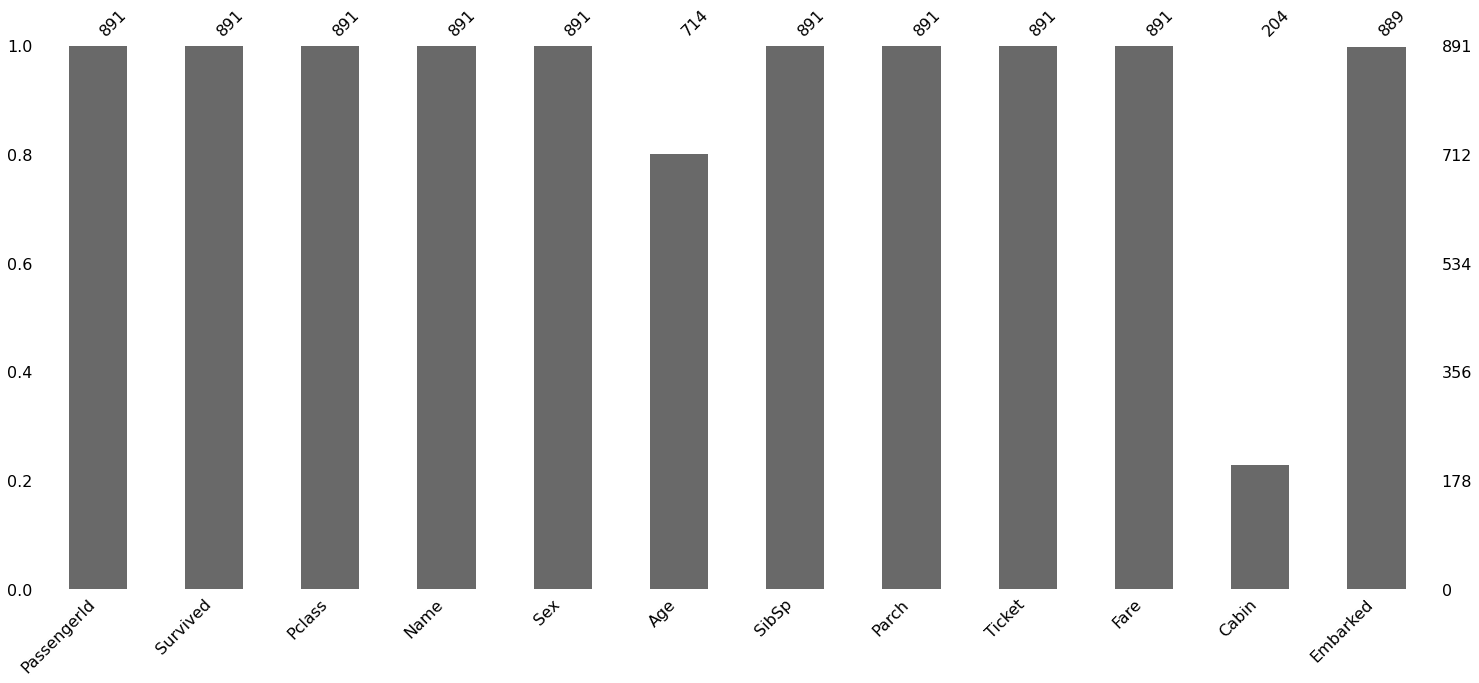

In [45]:
msno.bar(df_titanic)
plt.show()

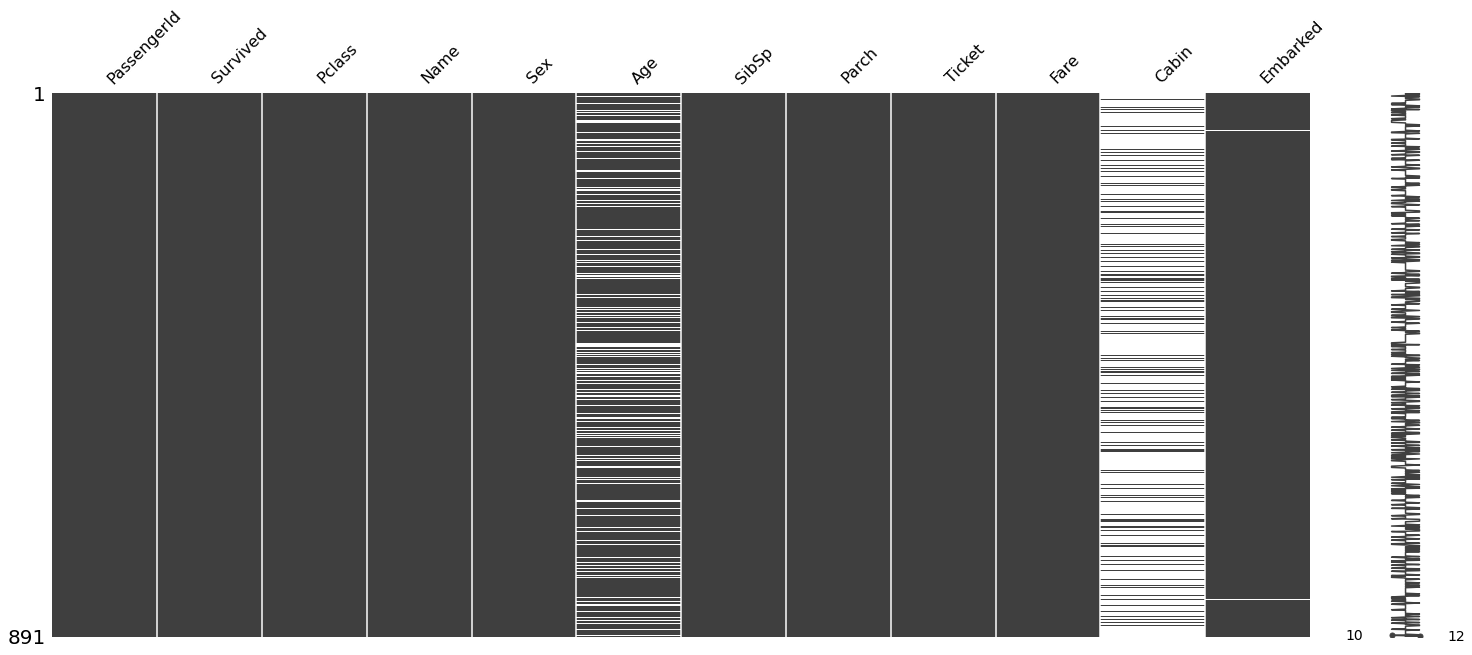

In [46]:
msno.matrix(df_titanic)
plt.show()

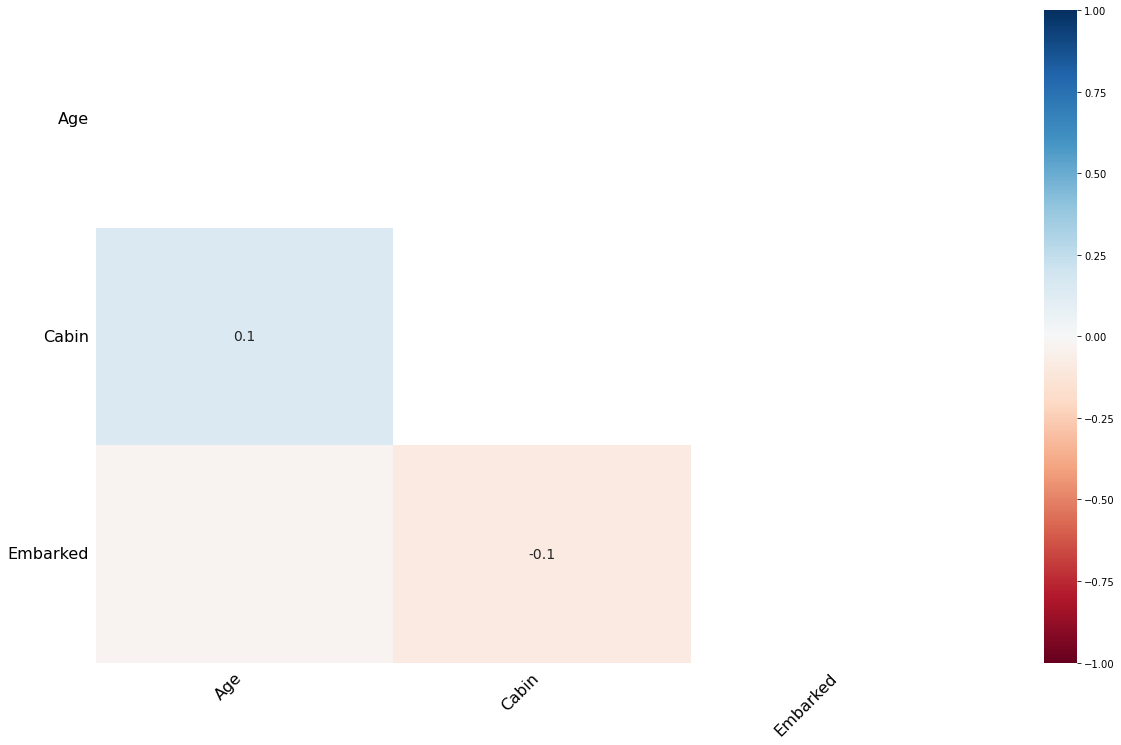

In [47]:
msno.heatmap(df_titanic)
plt.show()

#### 2.5.2 Investigation of the relationship of missing values with the dependent variable

In [48]:
na_cols = missing_values_table(df_titanic, True)

          number_of_missing_values  percentage_ratio
Cabin                          687            77.100
Age                            177            19.870
Embarked                         2             0.220


In [49]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [50]:
missing_vs_target(df_titanic, "Survived", na_cols)

# We wrote 1 to places with missing value and 0 to places full of places.

# Inferences
"""
- The lack of age variable may affect the result, but we cannot mention that it may have a great impact on its own.
- Those who do not have a cabin number are less likely to survive.
- 
"""

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2


